In [1]:
from easydatas.core.data import read_data
from easydatas.core.preprocessing import preprocess_data
from easydatas.core.feature_engineering import select_best_features
from easydatas.core.evaluation import evaluate_classification_model
from easydatas.core.data import read_dictionary
from easydatas.core.model import train_classification_model
from easydatas.core.evaluation import get_confusion_matrix

### Sample Demo

### Getting Data

In [3]:
test_data_dict = {
    'feature1': [1.0, 4.0, 7.0, 10.0],
    'feature2': [2.0, 5.0, 8.0, 11.0],
    'feature3': [3.0, 6.0, 9.0, 12.0],
    'target': [0, 1, 0, 1]
}

In [4]:
test_data_dict

{'feature1': [1.0, 4.0, 7.0, 10.0],
 'feature2': [2.0, 5.0, 8.0, 11.0],
 'feature3': [3.0, 6.0, 9.0, 12.0],
 'target': [0, 1, 0, 1]}

In [5]:
df = read_dictionary(test_data_dict)
df

,feature1,feature2,feature3,target
0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,1
2,7.0,8.0,9.0,0
3,10.0,11.0,12.0,1


### Preprocessing and Feature Selection

In [6]:
# Assuming you have a list of numerical columns used during training
numerical_cols = ['feature1', 'feature2', 'feature3']

In [7]:
# Preprocess test data
preprocessed_test_data = preprocess_data(df, numerical_cols)
preprocessed_test_data

,feature1,feature2,feature3,target
0,-1.341641,-1.341641,-1.341641,0
1,-0.447214,-0.447214,-0.447214,1
2,0.447214,0.447214,0.447214,0
3,1.341641,1.341641,1.341641,1


In [8]:
# Feature engineering (if applicable)
# Assuming you have X_train and y_train from your training data
X_test_selected = select_best_features(preprocessed_test_data.drop('target', axis=1), preprocessed_test_data['target'], k=3)
X_test_selected

array([[-1.34164079, -1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079,  1.34164079]])

### Training Model

In [19]:
trained_model = train_classification_model(X_test_selected, preprocessed_test_data['target'])

### Evaluating Model

In [11]:
evaluation_data_dict = {
    'feature1': [1.5, 4.5, 6.0, 9.5, 2.0, 7.5],
    'feature2': [3.0, 5.5, 7.0, 10.0, 1.5, 8.5],
    'feature3': [2.5, 6.5, 8.0, 11.5, 3.5, 9.0],
    'target': [0, 1, 0, 1, 0, 1]
}

In [12]:
evaluation_data = read_dictionary(evaluation_data_dict)
evaluation_data

,feature1,feature2,feature3,target
0,1.5,3.0,2.5,0
1,4.5,5.5,6.5,1
2,6.0,7.0,8.0,0
3,9.5,10.0,11.5,1
4,2.0,1.5,3.5,0
5,7.5,8.5,9.0,1


In [13]:
# Preprocess evaluation data
preprocessed_evaluation_data = preprocess_data(evaluation_data, numerical_cols)

# Feature engineering (if applicable)
# Assuming you have X_train and y_train from your training data
X_evaluation_selected = select_best_features(preprocessed_evaluation_data.drop('target', axis=1), preprocessed_evaluation_data['target'], k=3)


### Getting Predictions

In [14]:
predictions_evaluation = trained_model.predict(X_evaluation_selected)
predictions_evaluation

array([0, 1, 0, 1, 0, 0], dtype=int64)

In [22]:
accuracy = evaluate_classification_model(trained_model, X_evaluation_selected, preprocessed_evaluation_data['target'])
accuracy

0.8333333333333334

### Visualizing CM

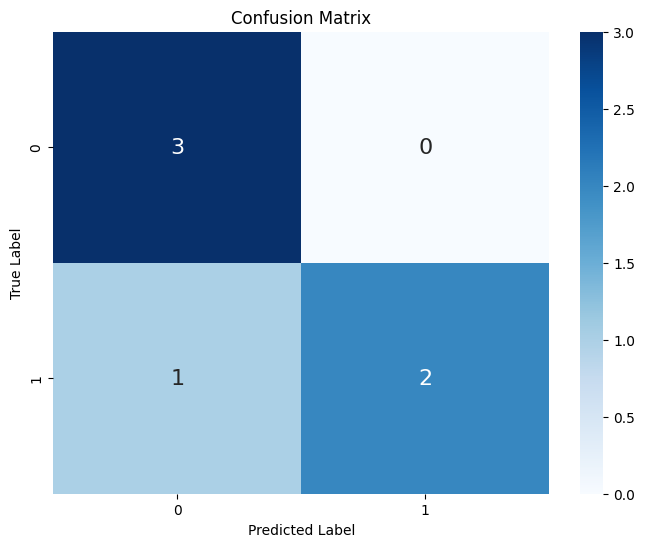

In [17]:
get_confusion_matrix(trained_model, preprocessed_evaluation_data['target'], predictions_evaluation)